<a href="https://colab.research.google.com/github/supersonic19/NLP-Research/blob/main/Ethan_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.layers.embeddings import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Bidirectional

### Research Paper work starts here

In [ ]:
import requests
import bs4
import numpy as np

In [ ]:
url = 'https://sfy.ru/?script=mission_impossible'

In [ ]:
response = requests.get(url)

In [ ]:
soup = bs4.BeautifulSoup(response.content , 'html.parser')

In [ ]:
script = soup.findAll('pre')

In [ ]:
paragraphs = []
for x in script:
    paragraphs.append(str(x))

In [ ]:
a = np.array(paragraphs)
string = a[0]
x = string.split('\n\n\t\t\t')
x[0]

"<pre>\nINT. KIEV APARTMENT - NIGHT\n\nWe're in a large closet.  JACK KIEFER, an athletic American\nin his late thirties wearing a headset, is wedged into a\ncorner, staring at a television screen.\n\nThe television shows a surveillance view of the living room\nthat lies outside the confines of the closet.  The TV image\nis in black and white.  JACK shifts, trying like hell to get\ncomfortable but he's been there a while\n\nON THE SCREEN\n\nA bare bulb shines down on the contents of a shabby hotel\nroom.  Directly under the blub a man, GENNADY KASIMOV, sits\nin a straight backed wooden chair in his blood-stained T-\nshirt.  There are a couple of THUGS and a stray HOOKER in the\nroom behind him.  A legend:"

In [ ]:
a = np.array(paragraphs)
string = a[0]
x = string.split('\n\n\t\t\t')

block = str(x[4])
lasun = block.split('\n\n')    
lasun



["KASIMOV\n\tI don't even know how I got here.\n\tI swear, Anatoly, I never touched her!  I\n\tdidn't lay a finger on her.",
 'ANATOLY moves away from the WOMAN.']

In [ ]:
for i in range(len(x)):
    block = str(x[i])
    dialogue = []
    
    lasun = block.split('\n\n')
    

In [ ]:
lasun = []
for i in range(len(x)):
    block = str(x[i])
    lasun.append(block.split('\n\n'))
    

In [ ]:
dialogue = []
for i in range(len(lasun)):
    dialogue.append(lasun[i][0])
    

In [ ]:
import re
all_diags = []
all_names = []
for i in range(2,len(dialogue)):
    
    filtered = dialogue[i].split('\n\t' , 1)
    
    #print(filtered)
    
    if len(filtered) is 1:
        continue
    new_names = filtered[0]    # 0 for names and 1 for diags
    new_diags = filtered[1]
    new_names = re.sub('\s+' , ' ' , new_names)
    new_diags = re.sub('\s+' , ' ' , new_diags)
    
    all_diags.append(new_diags)
    all_names.append(new_names)
#print("All Dialogues of all characters :")
#print(len(all_diags))


In [ ]:
all_diags

['Kasimov, Kasimov, good that you called us.',
 " (sobbing) I don't remember what happened! We were at the bar, drinking, laughing -- having fun.",
 "I don't even know how I got here. I swear, Anatoly, I never touched her! I didn't lay a finger on her.",
 "Kasimov. Don't flounder.",
 "Jesus, she's been under too long. Come on, come on!",
 "You're the only one who can help me.",
 "C'mon, c'mon, tell the truth...c'mon.",
 "They'll kill me.",
 'You asked for my help. You <u>asked</u> for <u>my</u> help...come on...',
 "You're right, of course.",
 'The name pal...give us the name.',
 'The contact in Minsk..the contact in Minsk..works in a travel agency.',
 'Come on!',
 'Come on!',
 'His name is.....Dimitri Miediev.',
 'Dimitri Miediev...Dimitri Miediev...',
 'Got him.',
 'Now, we drink.',
 'To friends.',
 'Yes, Anatoly, yes.',
 'Cheers.',
 ' (in English now) Get rid of this scum.',
 'Did we get it?',
 'We got it. On your feet.',
 'I want to sleep. Can I sleep here.',
 'Walk, just walk. Sta

In [ ]:
import pandas as pd
df = pd.DataFrame

In [ ]:
et = []
for i in range(len(all_names)):
    
    if all_names[i] == 'ETHAN':
        et.append(all_diags[i])
  
claire = []
for i in range(len(all_names)):
    
    if all_names[i] == 'CLAIRE':
        claire.append(all_diags[i])
        

In [ ]:
claire

['Did we get it?',
 'I want to sleep. Can I sleep here.',
 "I'm walking.",
 "Sleeping's better.",
 "Are <u>you</u> all right Ethan. What's wrong with you?",
 'Oh yeah?',
 " (carefully) Ethan -- Ethan, it's okay. It's Claire. Ethan what's wrong with you?",
 "I wasn't. I heard that Jim was in trouble on the radio. He said someone was...",
 'No, I got out of the car and I ran to the bridge.',
 'What happened to Jim?',
 'What happened to Jim?',
 " (mumbling) They're dead. Jim's dead.",
 'What?',
 'I walked away. He said abort. He was gone so I walked away.',
 ' (slowly) Who is "they?"',
 'Who is they, who is they?',
 " (screaming) No one sent me! We're supposed to be back here at four o'clock, four o'clock, if we abort, we don't return here until four o'clock, 0-four hundred, four am, four o'clock --!",
 "Why haven't they brought us in yet?",
 'What are you going to do?',
 "Ethan, you're not making sense. Let me go in and talk to Kittridge. I'm going to tell him you had nothing to do...",


In [ ]:
def unique(list1):
 
    # intilize a null list
    names= []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in names:
            names.append(x)
    return names
    # print list
    

names = unique(all_names)

['ANATOLY',
 'KASIMOV',
 'JACK',
 "ANATOLY (CONT'D)",
 'ETHAN',
 'CLAIRE',
 'VOICE (O.S.)',
 'FLIGHT ATTENDANT',
 'PHELPS',
 'KITTRIDGE',
 'KITTRIDGE (O.S.)',
 'SARAH',
 "PHELPS (CONT'D)",
 'SENATOR WALTZER',
 "JACK (CONT'D)",
 'DIPLOMAT',
 "DIPLOMAT (CONT'D)",
 'HANNAH',
 'PHELPS (O/S)',
 'GUARD',
 "SARAH (CONT'D)",
 'PHELPS (O.S.)',
 'ETHAN (O.S.)',
 'JACK (O.S.)',
 'CLAIRE (O.S.)',
 'FLAT VOICE (O.S.)',
 "KITTRIDGE (CONT'D)",
 "ETHAN (CONT'D)",
 'MATTHIAS',
 'MAX',
 'FEMALE IMF',
 'BARNES',
 'KRIEGER',
 'LUTHER',
 "KRIEGER (CONT'D)",
 'ETHAN (V.O.)',
 'AGENT LOWDEN/AGENT',
 'AGENT PAT/AGENT',
 'AGENT',
 'GUARD RICHARD',
 'GUARD RANDALL',
 'CIA ANALYST',
 'TECHNICIAN',
 'ANCHOR',
 'REPORTER',
 'PUBLIC OFFICIAL',
 'ETHAN VO',
 'WAITER',
 'ETHAN (O/S)',
 "CLAIRE (CONT'D)",
 'CONDUCTOR']

In [ ]:
len(et)

194

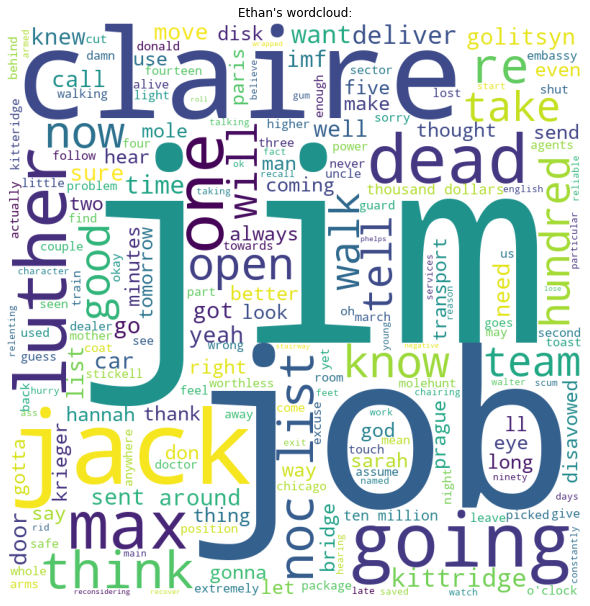

In [ ]:
# Python program to generate WordCloud 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in et: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Ethan's wordcloud:")
plt.show()

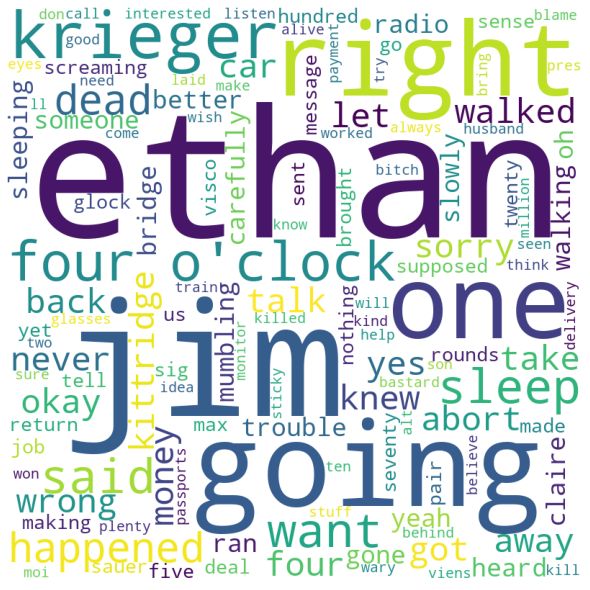

In [ ]:
# Python program to generate WordCloud 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in claire: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
count = 0
for i in all_names:
    if i == 'KITTRIDGE':
        count+=1
print(count)

46


In [ ]:
x = ['Swarad\n\nXYZ' , 'Sid' , 'Niharika' , 'Rahul']
a = x[0]
a.split('\n\n')

In [ ]:
y = 'swarad , sid , niha , rahul'
y.split(',' , 1)